# WeatherPy

---

### Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


In [3]:
cities

['san patricio',
 'rikitea',
 'san cristobal',
 'mandalgovi',
 'hobart',
 'asbe teferi',
 'mataura',
 'korla',
 'russell',
 'shache',
 'puerto ayora',
 'redondela',
 'airai',
 'tumannyy',
 'thompson',
 'vaini',
 'sentyabrskiy',
 'makat',
 'ushuaia',
 'palabuhanratu',
 'caceres',
 'port alfred',
 'port macquarie',
 'castro',
 'pontianak',
 'tsihombe',
 'butaritari',
 'narsaq',
 'aanekoski',
 'hilo',
 'kaitangata',
 'mar del plata',
 'sarahan',
 'longyearbyen',
 'pisco',
 'pampas',
 'ribeira grande',
 'bluff',
 'iralaya',
 'cherskiy',
 'albanel',
 'gazanjyk',
 'willmar',
 'viligili',
 'abu samrah',
 'tiksi',
 'ancud',
 'genhe',
 'chapais',
 'tasiilaq',
 'vila franca do campo',
 'sitka',
 'valdivia',
 'santa maria',
 'fukue',
 'ketchikan',
 'dungarpur',
 'hithadhoo',
 'new norfolk',
 'lompoc',
 'esperance',
 'belushya guba',
 'champagnole',
 'geraldton',
 'kodiak',
 'lavrentiya',
 'dikson',
 'barrow',
 'ilulissat',
 'bethel',
 'nikolskoye',
 'great yarmouth',
 'illoqqortoormiut',
 'najran

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_response['coord']['lat']
        city_lng = city_weather_response['coord']['lon']
        city_max_temp = city_weather_response['main']['temp_max']
        city_humidity = city_weather_response['main']['humidity']
        city_clouds = city_weather_response['clouds']['all']
        city_wind = city_weather_response['wind']['speed']
        city_country = city_weather_response['sys']['country']
        city_date = city_weather_response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | san cristobal
Processing Record 4 of Set 1 | mandalgovi
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | asbe teferi
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | korla
Processing Record 9 of Set 1 | russell
Processing Record 10 of Set 1 | shache
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | redondela
Processing Record 13 of Set 1 | airai
Processing Record 14 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 18 of Set 1 | makat
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 21 of Set 1 | cacer

Processing Record 31 of Set 4 | san carlos de bariloche
Processing Record 32 of Set 4 | maragua
Processing Record 33 of Set 4 | hirara
Processing Record 34 of Set 4 | halifax
Processing Record 35 of Set 4 | olafsvik
Processing Record 36 of Set 4 | hoganas
Processing Record 37 of Set 4 | palma di montechiaro
Processing Record 38 of Set 4 | beira
Processing Record 39 of Set 4 | ostrovnoy
Processing Record 40 of Set 4 | komsomolskiy
Processing Record 41 of Set 4 | cayenne
Processing Record 42 of Set 4 | razdolnoye
Processing Record 43 of Set 4 | saleaula
City not found. Skipping...
Processing Record 44 of Set 4 | hegra
Processing Record 45 of Set 4 | tual
Processing Record 46 of Set 4 | teya
Processing Record 47 of Set 4 | huejuquilla el alto
Processing Record 48 of Set 4 | kahului
Processing Record 49 of Set 4 | sechura
Processing Record 0 of Set 5 | isangel
Processing Record 1 of Set 5 | olpad
Processing Record 2 of Set 5 | octeville
Processing Record 3 of Set 5 | pangkalanbuun
Processi

Processing Record 17 of Set 8 | praia
Processing Record 18 of Set 8 | qujing
Processing Record 19 of Set 8 | belyy yar
Processing Record 20 of Set 8 | vardo
Processing Record 21 of Set 8 | viksoyri
City not found. Skipping...
Processing Record 22 of Set 8 | bowen
Processing Record 23 of Set 8 | matara
Processing Record 24 of Set 8 | satipo
Processing Record 25 of Set 8 | pryozerne
Processing Record 26 of Set 8 | norman wells
Processing Record 27 of Set 8 | milingimbi
City not found. Skipping...
Processing Record 28 of Set 8 | jiuquan
Processing Record 29 of Set 8 | mundo nuevo
Processing Record 30 of Set 8 | visegrad
Processing Record 31 of Set 8 | uhlove
Processing Record 32 of Set 8 | haibowan
City not found. Skipping...
Processing Record 33 of Set 8 | shelburne
Processing Record 34 of Set 8 | jambi
Processing Record 35 of Set 8 | dese
Processing Record 36 of Set 8 | boone
Processing Record 37 of Set 8 | gradistea
Processing Record 38 of Set 8 | santa fe
Processing Record 39 of Set 8

Processing Record 4 of Set 12 | tikhvin
Processing Record 5 of Set 12 | marystown
Processing Record 6 of Set 12 | almaznyy
Processing Record 7 of Set 12 | tolentino
Processing Record 8 of Set 12 | chapada dos guimaraes
Processing Record 9 of Set 12 | makokou
Processing Record 10 of Set 12 | hongan
City not found. Skipping...
Processing Record 11 of Set 12 | falealupo
City not found. Skipping...
Processing Record 12 of Set 12 | hudiksvall
Processing Record 13 of Set 12 | kalianget
Processing Record 14 of Set 12 | conceicao do araguaia
Processing Record 15 of Set 12 | zaraza
Processing Record 16 of Set 12 | loralai
Processing Record 17 of Set 12 | north bend
Processing Record 18 of Set 12 | la massana
Processing Record 19 of Set 12 | muisne
Processing Record 20 of Set 12 | matay
Processing Record 21 of Set 12 | biak
Processing Record 22 of Set 12 | jogindarnagar
Processing Record 23 of Set 12 | panguna
Processing Record 24 of Set 12 | wagar
Processing Record 25 of Set 12 | vila
Processin

In [5]:
city_data

[{'City': 'san patricio',
  'Lat': 28.017,
  'Lng': -97.5169,
  'Max Temp': 13.24,
  'Humidity': 91,
  'Cloudiness': 0,
  'Wind Speed': 4.56,
  'Country': 'US',
  'Date': 1674385167},
 {'City': 'rikitea',
  'Lat': -23.1203,
  'Lng': -134.9692,
  'Max Temp': 25.96,
  'Humidity': 77,
  'Cloudiness': 28,
  'Wind Speed': 8.09,
  'Country': 'PF',
  'Date': 1674385168},
 {'City': 'san cristobal',
  'Lat': 7.7669,
  'Lng': -72.225,
  'Max Temp': 17.1,
  'Humidity': 72,
  'Cloudiness': 88,
  'Wind Speed': 1.61,
  'Country': 'VE',
  'Date': 1674385168},
 {'City': 'mandalgovi',
  'Lat': 45.7625,
  'Lng': 106.2708,
  'Max Temp': -26.34,
  'Humidity': 51,
  'Cloudiness': 100,
  'Wind Speed': 9.37,
  'Country': 'MN',
  'Date': 1674385052},
 {'City': 'hobart',
  'Lat': -42.8794,
  'Lng': 147.3294,
  'Max Temp': 18.36,
  'Humidity': 84,
  'Cloudiness': 75,
  'Wind Speed': 2.57,
  'Country': 'AU',
  'Date': 1674385168},
 {'City': 'asbe teferi',
  'Lat': 9.0833,
  'Lng': 40.8667,
  'Max Temp': 24.96,
 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san patricio,28.0170,-97.5169,13.24,91,0,4.56,US,1674385167
1,rikitea,-23.1203,-134.9692,25.96,77,28,8.09,PF,1674385168
2,san cristobal,7.7669,-72.2250,17.10,72,88,1.61,VE,1674385168
3,mandalgovi,45.7625,106.2708,-26.34,51,100,9.37,MN,1674385052
4,hobart,-42.8794,147.3294,18.36,84,75,2.57,AU,1674385168


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,13.24,91,0,4.56,US,1674385167
1,rikitea,-23.1203,-134.9692,25.96,77,28,8.09,PF,1674385168
2,san cristobal,7.7669,-72.2250,17.10,72,88,1.61,VE,1674385168
3,mandalgovi,45.7625,106.2708,-26.34,51,100,9.37,MN,1674385052
4,hobart,-42.8794,147.3294,18.36,84,75,2.57,AU,1674385168


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

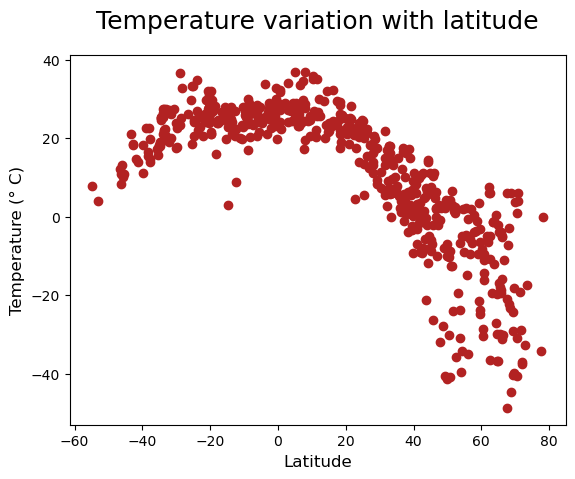

In [10]:
# scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Max Temp'], color='firebrick')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Temperature (° C)', fontsize=12)
plt.title('Temperature variation with latitude', fontsize=18, y=1.05)
#plt.xlim(-70,90)
#plt.ylim(-60,60)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

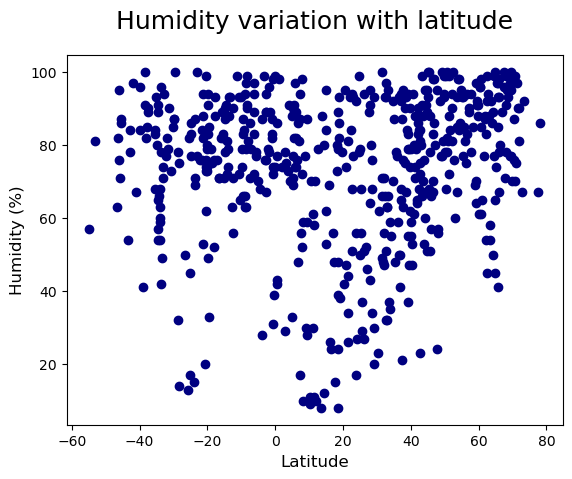

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Humidity'], color='navy')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity (%)', fontsize=12)
plt.title('Humidity variation with latitude', fontsize=18, y=1.05)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

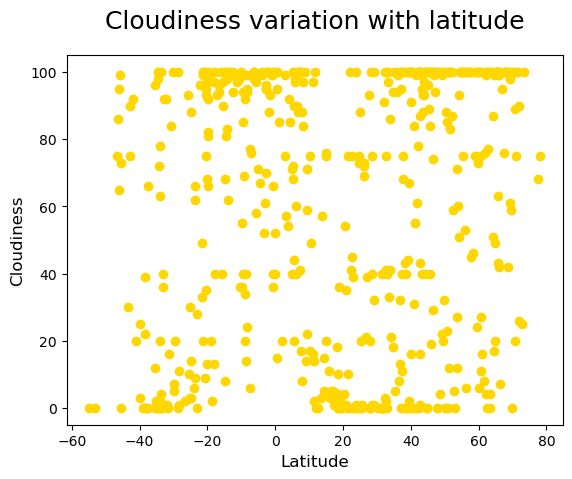

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Cloudiness'], color='gold')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness', fontsize=12)
plt.title('Cloudiness variation with latitude', fontsize=18, y=1.05)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

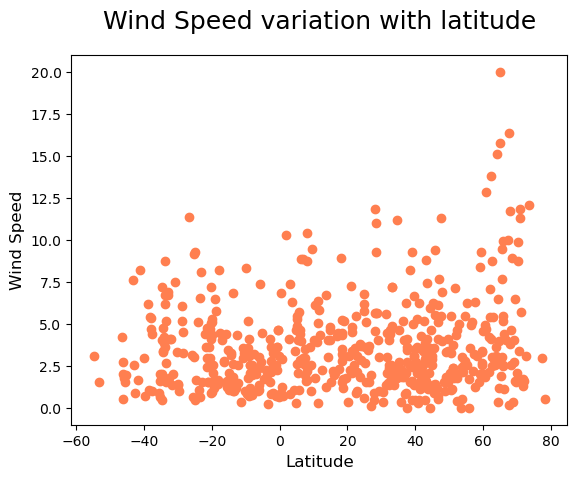

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Wind Speed'], color='coral')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed', fontsize=12)
plt.title('Wind Speed variation with latitude', fontsize=18, y=1.05)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
    
def lin_reg_plot(x_value, y_value):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    regress_values = x_value * slope + intercept
    plt.plot(x_value, regress_values, "g-")
    #plt.title(f'The r-value is: {rvalue}',loc='left', y=1.05)
    x_min = min(x_value)
    y_min = min(y_value)
    plt.annotate(line_eq,(x_min, y_min),fontsize=15,color='g')
    print(f'The r-value is: {rvalue}')

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,13.24,91,0,4.56,US,1674385167
2,san cristobal,7.7669,-72.2250,17.10,72,88,1.61,VE,1674385168
3,mandalgovi,45.7625,106.2708,-26.34,51,100,9.37,MN,1674385052
5,asbe teferi,9.0833,40.8667,24.96,30,14,3.63,ET,1674385168
7,korla,41.7597,86.1469,-9.13,65,0,4.25,CN,1674385168


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rikitea,-23.1203,-134.9692,25.96,77,28,8.09,PF,1674385168
4,hobart,-42.8794,147.3294,18.36,84,75,2.57,AU,1674385168
6,mataura,-46.1927,168.8643,8.29,95,65,0.53,NZ,1674385168
10,puerto ayora,-0.7393,-90.3518,23.08,98,66,2.23,EC,1674385169
12,airai,-8.9266,125.4092,16.87,94,92,0.69,TL,1674385169


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8422989017255196


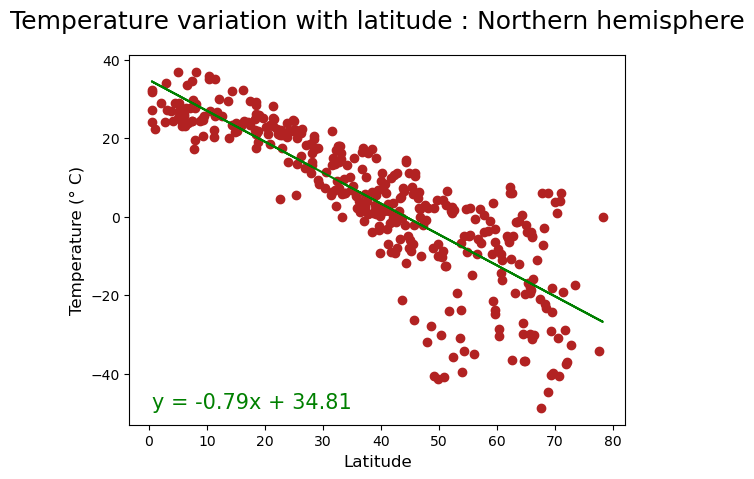

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

plt.scatter(x_values, y_values, color='firebrick')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Temperature (° C)', fontsize=12)
plt.title('Temperature variation with latitude : Northern hemisphere', fontsize=18, y=1.05)

#Linear regression plot
lin_reg_plot(x_values, y_values)

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

The r-value is: 0.517410751019748


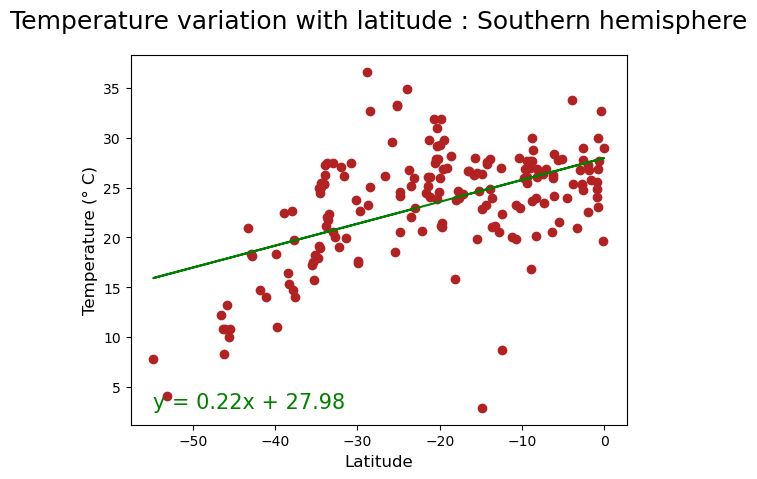

In [18]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plt.scatter(x_values, y_values, color='firebrick')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Temperature (° C)', fontsize=12)
plt.title('Temperature variation with latitude : Southern hemisphere', fontsize=18, y=1.05)

#Linear regression plot
lin_reg_plot(x_values, y_values)

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 

It can be seen from the graphs that the temperature is increasing with the increase in latitude.
It shows that the temperature near the equator is higher and the temperature startts to decrease as we move further from the equator on both sides.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3687389916540858


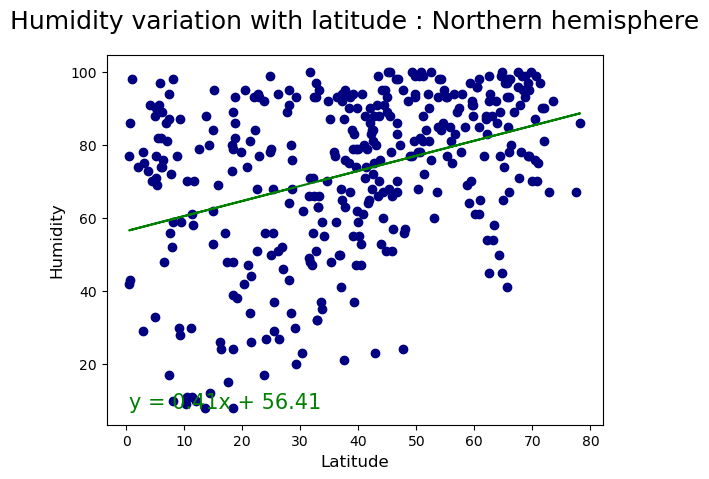

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

plt.scatter(x_values, y_values, color='navy')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity', fontsize=12)
plt.title('Humidity variation with latitude : Northern hemisphere', fontsize=18, y=1.05)

#Linear regression plot
lin_reg_plot(x_values, y_values)

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()

The r-value is: 0.0994028211312598


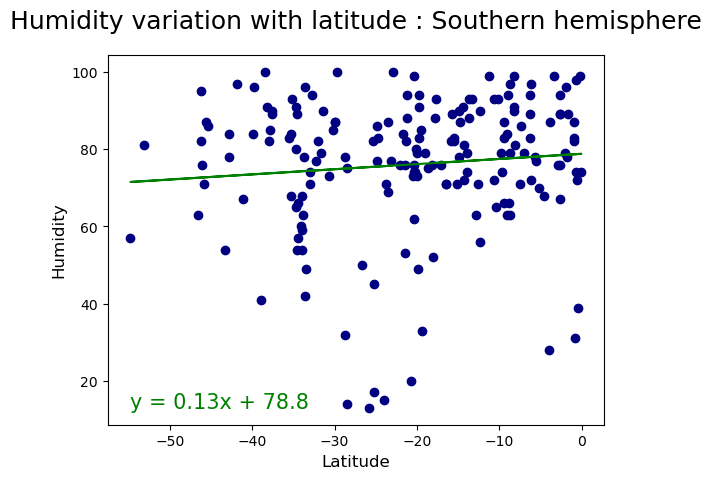

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

plt.scatter(x_values, y_values, color='navy')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity', fontsize=12)
plt.title('Humidity variation with latitude : Southern hemisphere', fontsize=18, y=1.05)

#Linear regression plot
lin_reg_plot(x_values, y_values)

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 

The humidity value has a slight positive corelation with the latitude in the northern hemisphere. But in the southern hemisphere is very less (about 0.1) which signifies that there is almost no relation between the humidity value and the latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.22858209801698073


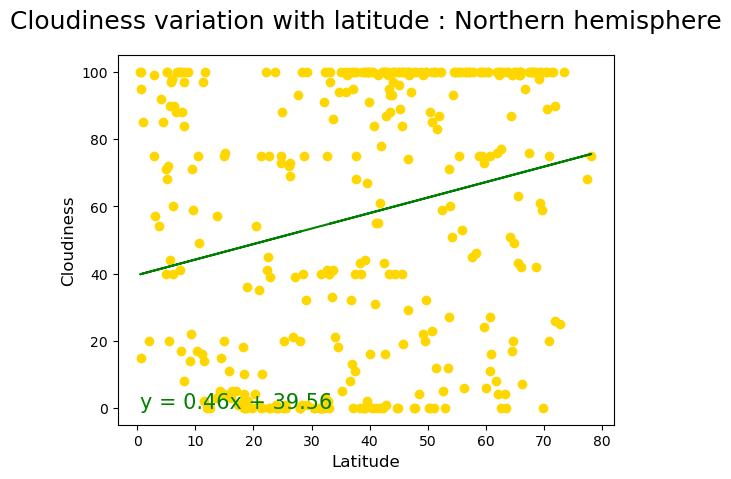

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

plt.scatter(x_values, y_values, color='gold')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness', fontsize=12)
plt.title('Cloudiness variation with latitude : Northern hemisphere', fontsize=18, y=1.05)

#Linear regression plot
lin_reg_plot(x_values, y_values)

# Save the figure
plt.savefig("output_data/Fig9.png")

# Show plot
plt.show()

The r-value is: 0.4116452930500156


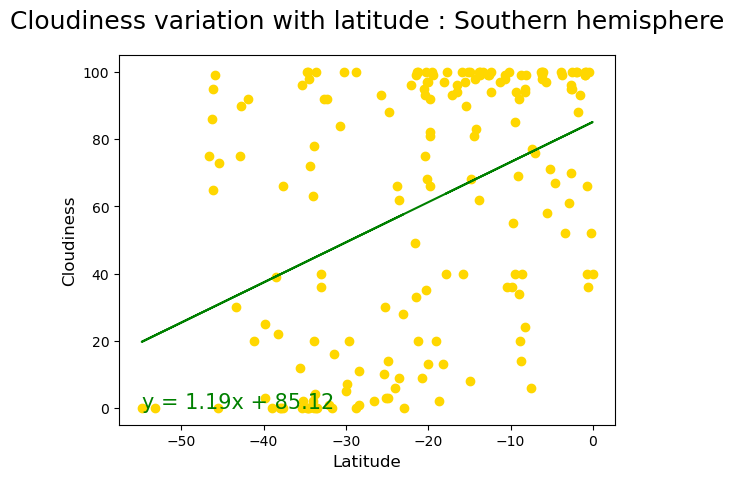

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

plt.scatter(x_values, y_values, color='gold')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness', fontsize=12)
plt.title('Cloudiness variation with latitude : Southern hemisphere', fontsize=18, y=1.05)

#Linear regression plot
lin_reg_plot(x_values, y_values)

# Save the figure
plt.savefig("output_data/Fig10.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 

It can be seen from the linear regression plots that the values of the cloudiness are fairly distributed and although weak positive corelation coefficient is seen between the cloudiness and latitude, based on the distribution, the corelation is not very prominent.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.12507697144553265


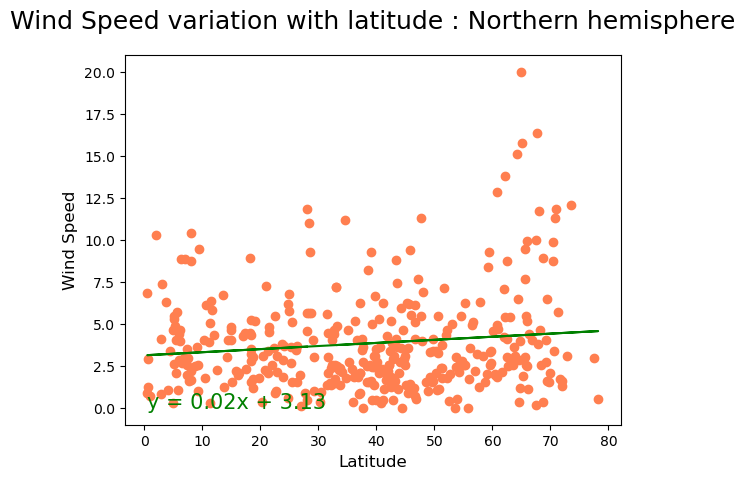

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

plt.scatter(x_values, y_values, color='coral')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed', fontsize=12)
plt.title('Wind Speed variation with latitude : Northern hemisphere', fontsize=18, y=1.05)

#Linear regression plot
lin_reg_plot(x_values, y_values)

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()

The r-value is: -0.1747782266650554


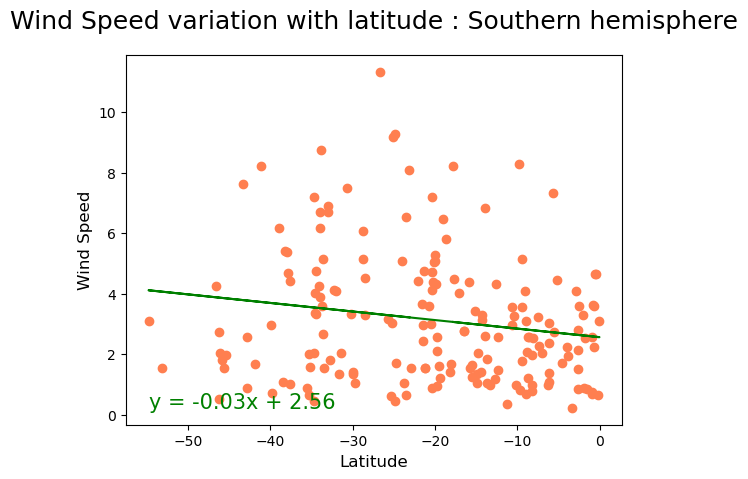

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

plt.scatter(x_values, y_values, color='coral')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed', fontsize=12)
plt.title('Wind Speed variation with latitude : Southern hemisphere', fontsize=18, y=1.05)

#Linear regression plot
lin_reg_plot(x_values, y_values)

# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 

The wind velocity also does not seem to have a great dependence on the latitude. Although the corelation coefficient is positive (0.125) in the northern hemisphere and negative (-0.17) in the southern hemisphere, the r values are very less and it simply shows that the wind speed is not dependent on the latitude.